In [105]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import GPy
import torch
from __future__ import absolute_import, division, print_function
import torch
from torch.distributions import constraints
from torch.nn import Parameter
import pyro
from pyro.contrib.gp.util import Parameterized
import pyro.distributions as dist
import pyro.infer as infer
import pyro.optim as optim
from pyro.params import param_with_module_name
import pyro.contrib.gp as gp
import pyro.distributions as dist
import matplotlib.pyplot as plt
pyro.clear_param_store()
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy
import math
import cProfile
import time
import GPy
import numpy as np
from matplotlib import pyplot as plt

import statsmodels.api as sm
import sympy as sp
#import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma
from GPy.core.parameterization.variational import NormalPosterior, NormalPrior

from sympy.interactive import printing
import pyro.contrib.gp.models.vsgp as vsgp
from GPy.util.linalg import pdinv
from pyro.infer.mcmc.hmc import HMC
from pyro.infer.mcmc import MCMC
from matplotlib import pyplot
pyro.clear_param_store()
import time
torch.manual_seed(12)
pyro.set_rng_seed(101)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import gpflow

In [106]:
import pods

data = pods.datasets.brendan_faces()

In [107]:
Y = data['Y']
Yn = Y - Y.mean()
Yn /= Yn.std()
#X_flat = np.array(Yn).reshape((1965, 20*28))

In [108]:
Q=2
M = 20  # number of inducing pts
N = Y.shape[0]
sample_mean = np.mean(Y[:N,:])
sample_std = np.std(Y[:N,:])
sample_norm = (Y[:N,:] - sample_mean)/sample_std
X_flat = np.array(sample_norm).reshape((1965, 20*28))
X_mean = gpflow.models.PCA_reduce(X_flat, Q) # Initialise via PCA
Z = np.random.permutation(X_mean.copy())[:M]
Xu = torch.tensor(Z).float()
Xr, fracs = initialize_latent(Q, X_flat)
X_loc = torch.tensor(Xr).float()
X_variance = torch.tensor(np.random.uniform(0,.1,X_mean.shape)).float()
fracs = torch.tensor(1./fracs).float()

In [109]:
kernel = gp.kernels.RBF(input_dim=Q, lengthscale=fracs)
gpmodel = gp.models.SparseGPRegression(X_loc, torch.tensor(X_flat.T).float(), kernel, Xu, noise=torch.tensor(0.14006797274966637),approx='VFE')
gplvm = gp.models.GPLVM(gpmodel)

CPU+SystemTime:1839.1875 seconds
Code Run Time:1420.751142501831 seconds


Text(0.5,1,'Convergence of SVI')

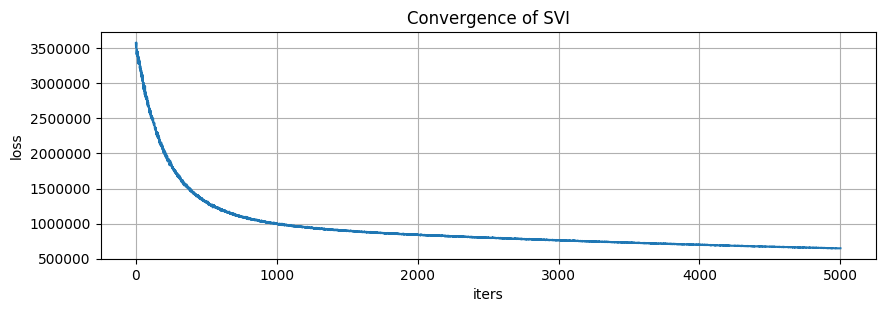

In [110]:
i=list(range(1,5001))
st = time.process_time()
st2 = time.time()
losses = gplvm.optimize(num_steps=5000)  # doctest: +SKIP
end =  time.process_time()
end2 = time.time()
print(str('CPU+SystemTime:')+str(end-st)+' '+str('seconds'))
print(str('Code Run Time:')+str(end2-st2)+' '+str('seconds'))
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(i,losses)
pyplot.xlabel('iters')
pyplot.ylabel('loss')
pyplot.grid()
pyplot.title('Convergence of SVI')

In [111]:
X = gplvm.get_param("X_loc")
X_var = gplvm.get_param("X_scale_tril")
Kfu = gplvm.base_model.kernel(X, gplvm.base_model.get_param('Xu')).detach().numpy()
Kuu = gplvm.base_model.kernel(gplvm.base_model.get_param('Xu'), gplvm.base_model.get_param('Xu')).detach().numpy()
Kuf = Kfu.T
print('Kfu shape'+str(Kfu.shape))
print('Kuu shape'+str(Kuu.shape))
print('Kuf shape'+str(Kuf.shape))
noise = gplvm.base_model.get_param('noise').detach().numpy()
K = np.dot(np.dot(Kfu,pdinv(Kuu)[0]),Kuf)  + np.eye(X.shape[0])*(1/noise)

Kfu shape(1965, 20)
Kuu shape(20, 20)
Kuf shape(20, 1965)


 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning:The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0


Text(0.5,1,'FITC ARD Contribution')

 /home/aneeqr/.local/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


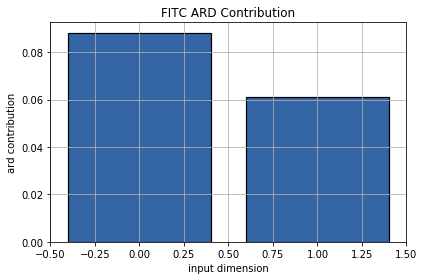

In [112]:
active = gplvm.base_model.kernel.active_dims
input_dim = gplvm.base_model.kernel.input_dim
Var = gplvm.base_model.kernel.get_param('variance').detach().numpy()
Len = gplvm.base_model.kernel.get_param('lengthscale').detach().numpy()
Co = GPy.kern.RBF(ARD=True,active_dims=active,input_dim=input_dim,lengthscale=Len,variance=Var)
Co.plot_ARD()
plt.grid()
plt.title('FITC ARD Contribution')

In [113]:
dd_proj = distance_matrix(X)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)
ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1

Neearest neighbourboost size k =1 Continuity:0.9851069207825691
Neearest neighbourboost size k =3 Continuity:0.9810256876287411
Neearest neighbourboost size k =5 Continuity:0.978071072589946
Neearest neighbourboost size k =7 Continuity:0.9763482675137765
Neearest neighbourboost size k =10 Continuity:0.973827490183103


In [114]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1

Neearest neighbourboost size k =1 Trust:0.9281677963443293
Neearest neighbourboost size k =3 Trust:0.9286976164511607
Neearest neighbourboost size k =5 Trust:0.9285817077340948
Neearest neighbourboost size k =7 Trust:0.9292991810552188
Neearest neighbourboost size k =10 Trust:0.9301991050096358


In [ ]:
import pickle
model={}
model[0]=gplvm
pickle.dump(model, open( "BrendanFacesDTC.p", "wb" ) )

In [27]:
from sklearn.decomposition import PCA

In [29]:
pca_dims = PCA()
pca_dims.fit(X_flat)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

Text(0.5,1,'PCA Explained Variance Ratio')

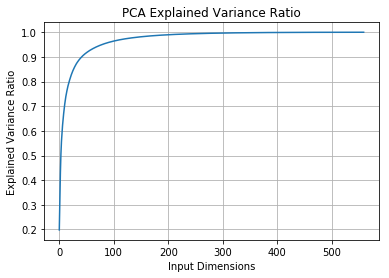

In [31]:
plt.figure()
plt.plot(list(range(len(pca_dims.explained_variance_ratio_))),cumsum)
plt.grid()
plt.xlabel('Input Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')

In [32]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_flat)
X_recovered = pca.inverse_transform(X_reduced)

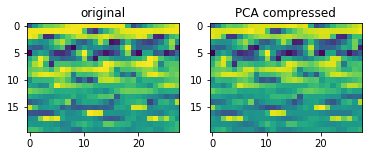

In [34]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_flat[0].reshape((20,28)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((20,28)))
plt.show(block=True)

Neearest neighbourboost size k =1 Continuity:0.9999548906682014
Neearest neighbourboost size k =3 Continuity:0.9999565525955929
Neearest neighbourboost size k =5 Continuity:0.9999555324983325
Neearest neighbourboost size k =7 Continuity:0.9999530458264548
Neearest neighbourboost size k =10 Continuity:0.9999562489762169


Text(0.5,1,'Continuity vs Nearest Neighbour Classification Size')

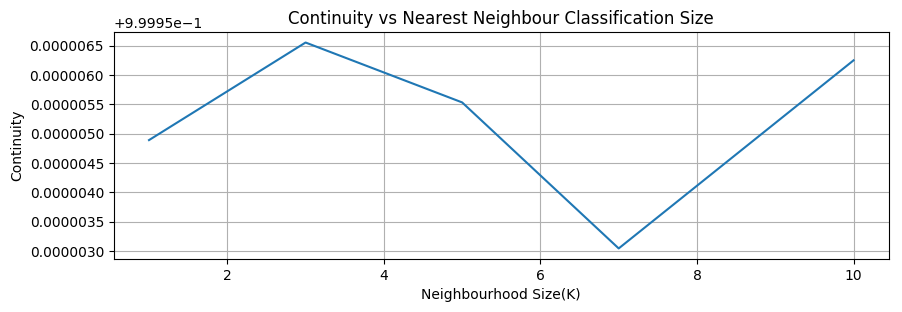

In [37]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(X_reduced)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)

ks=[1,3,5,7,10] #15,20,25,30,40,45,50,55,60,75]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,cont)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Continuity')
pyplot.title('Continuity vs Nearest Neighbour Classification Size')

Neearest neighbourboost size k =1 Trust:0.9999561869133681
Neearest neighbourboost size k =3 Trust:0.9999517924218033
Neearest neighbourboost size k =5 Trust:0.9999478872085721
Neearest neighbourboost size k =7 Trust:0.9999434838434111
Neearest neighbourboost size k =10 Trust:0.9999426224640362


Text(0.5,1,'Trust vs Nearest Neighbour Classification Size')

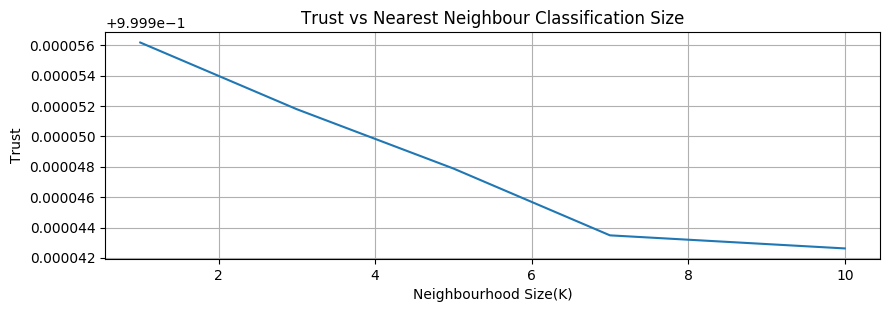

In [38]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [44]:
m = GPy.models.BayesianGPLVM(Yn,Z=Z, input_dim= 2,  init="PCA",num_inducing=20,stochastic=False)
m.data_labels = Y.argmax(axis=1)
loss2 = m.optimize('bfgs', messages=1,max_iters=10000) #scg', 'lbfgs', 'tnc'

Neearest neighbourboost size k =1 Continuity:0.9706543056727577
Neearest neighbourboost size k =3 Continuity:0.9642621730626093
Neearest neighbourboost size k =5 Continuity:0.9615988537266237
Neearest neighbourboost size k =7 Continuity:0.9593481034346122
Neearest neighbourboost size k =10 Continuity:0.9567709342840567


Text(0.5,1,'Continuity vs Nearest Neighbour Classification Size')

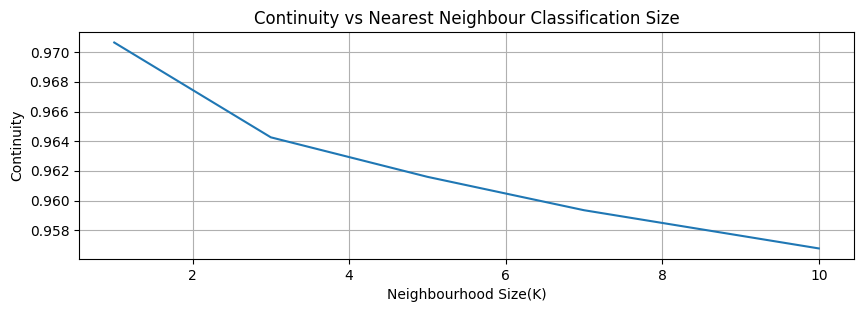

In [45]:
X0= list(m.X.mean[:,0])
X1= list(m.X.mean[:,1])
t= np.column_stack((X0, X1))
dd_proj = distance_matrix(t)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)

ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,cont)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Continuity')
pyplot.title('Continuity vs Nearest Neighbour Classification Size')

Neearest neighbourboost size k =1 Trust:0.9635101800614161
Neearest neighbourboost size k =3 Trust:0.9648490592165619
Neearest neighbourboost size k =5 Trust:0.9636411342593496
Neearest neighbourboost size k =7 Trust:0.9630111614758493
Neearest neighbourboost size k =10 Trust:0.9631949211222033


Text(0.5,1,'Trust vs Nearest Neighbour Classification Size')

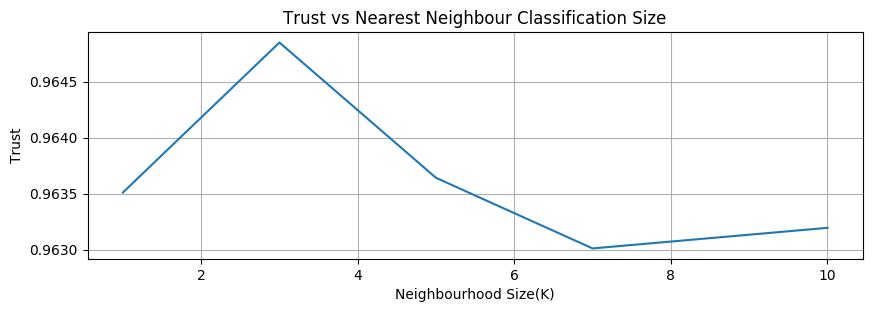

In [46]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [47]:
m.Gaussian_noise

Gaussian_noise.,value,constraints,priors
variance,0.14006797274966637,+ve,


In [60]:
reduced,E = sammon(data['Y'], n = 2, display = 2, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'pca')

epoch = 0: E = 0.18734959295552062
epoch = 1: E = 0.18656798981974723
epoch = 2: E = 0.18743363425803214
epoch = 3: E = 0.18734959295552062
epoch = 4: E = 0.18656798981974723
epoch = 5: E = 0.18743363425803214
epoch = 6: E = 0.18734959295552062
epoch = 7: E = 0.18656798981974723
epoch = 8: E = 0.18743363425803214
epoch = 9: E = 0.18734959295552062
epoch = 10: E = 0.18656798981974723
epoch = 11: E = 0.18743363425803214
epoch = 12: E = 0.18734959295552062
epoch = 13: E = 0.18656798981974723
epoch = 14: E = 0.18743363425803214
epoch = 15: E = 0.18734959295552062
epoch = 16: E = 0.18656798981974723
epoch = 17: E = 0.18743363425803214
epoch = 18: E = 0.18734959295552062
epoch = 19: E = 0.18656798981974723
epoch = 20: E = 0.18743363425803214
epoch = 21: E = 0.18734959295552062
epoch = 22: E = 0.18656798981974723
epoch = 23: E = 0.18743363425803214
epoch = 24: E = 0.18734959295552062
epoch = 25: E = 0.18656798981974723
epoch = 26: E = 0.18743363425803214
epoch = 27: E = 0.18734959295552062
ep

epoch = 225: E = 0.18734959295552062
epoch = 226: E = 0.18656798981974723
epoch = 227: E = 0.18743363425803214
epoch = 228: E = 0.18734959295552062
epoch = 229: E = 0.18656798981974723
epoch = 230: E = 0.18743363425803214
epoch = 231: E = 0.18734959295552062
epoch = 232: E = 0.18656798981974723
epoch = 233: E = 0.18743363425803214
epoch = 234: E = 0.18734959295552062
epoch = 235: E = 0.18656798981974723
epoch = 236: E = 0.18743363425803214
epoch = 237: E = 0.18734959295552062
epoch = 238: E = 0.18656798981974723
epoch = 239: E = 0.18743363425803214
epoch = 240: E = 0.18734959295552062
epoch = 241: E = 0.18656798981974723
epoch = 242: E = 0.18743363425803214
epoch = 243: E = 0.18734959295552062
epoch = 244: E = 0.18656798981974723
epoch = 245: E = 0.18743363425803214
epoch = 246: E = 0.18734959295552062
epoch = 247: E = 0.18656798981974723
epoch = 248: E = 0.18743363425803214
epoch = 249: E = 0.18734959295552062
epoch = 250: E = 0.18656798981974723
epoch = 251: E = 0.18743363425803214
e

epoch = 447: E = 0.18734959295552062
epoch = 448: E = 0.18656798981974723
epoch = 449: E = 0.18743363425803214
epoch = 450: E = 0.18734959295552062
epoch = 451: E = 0.18656798981974723
epoch = 452: E = 0.18743363425803214
epoch = 453: E = 0.18734959295552062
epoch = 454: E = 0.18656798981974723
epoch = 455: E = 0.18743363425803214
epoch = 456: E = 0.18734959295552062
epoch = 457: E = 0.18656798981974723
epoch = 458: E = 0.18743363425803214
epoch = 459: E = 0.18734959295552062
epoch = 460: E = 0.18656798981974723
epoch = 461: E = 0.18743363425803214
epoch = 462: E = 0.18734959295552062
epoch = 463: E = 0.18656798981974723
epoch = 464: E = 0.18743363425803214
epoch = 465: E = 0.18734959295552062
epoch = 466: E = 0.18656798981974723
epoch = 467: E = 0.18743363425803214
epoch = 468: E = 0.18734959295552062
epoch = 469: E = 0.18656798981974723
epoch = 470: E = 0.18743363425803214
epoch = 471: E = 0.18734959295552062
epoch = 472: E = 0.18656798981974723
epoch = 473: E = 0.18743363425803214
e

In [81]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(reduced)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)

#ks=[1,3,5,7,10] #15,20,25,30,40,45,50,55,60,75]
ks=[3]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,cont)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Continuity')
pyplot.title('Continuity vs Nearest Neighbour Classification Size')

KeyboardInterrupt: 

In [ ]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [64]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

In [65]:
n_neighbors = 10
n_components = 2

In [66]:
methods = ['standard']
labels = ['LLE']

for i, method in enumerate(methods):
    t0 = time()
    LLC_obtain = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X_flat)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

standard: 12 sec


In [67]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(LLC_obtain)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)
ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1

Neearest neighbourboost size k =1 Continuity:0.9813882526485529
Neearest neighbourboost size k =3 Continuity:0.9727814128195807
Neearest neighbourboost size k =5 Continuity:0.9674529613145738
Neearest neighbourboost size k =7 Continuity:0.9622203817575222
Neearest neighbourboost size k =10 Continuity:0.9553742167855397


Neearest neighbourboost size k =1 Trust:0.9017993179157933
Neearest neighbourboost size k =3 Trust:0.8936451679908605
Neearest neighbourboost size k =5 Trust:0.8913194495911461
Neearest neighbourboost size k =7 Trust:0.8896790112983946
Neearest neighbourboost size k =10 Trust:0.8851134139568637


Text(0.5,1,'Trust vs Nearest Neighbour Classification Size')

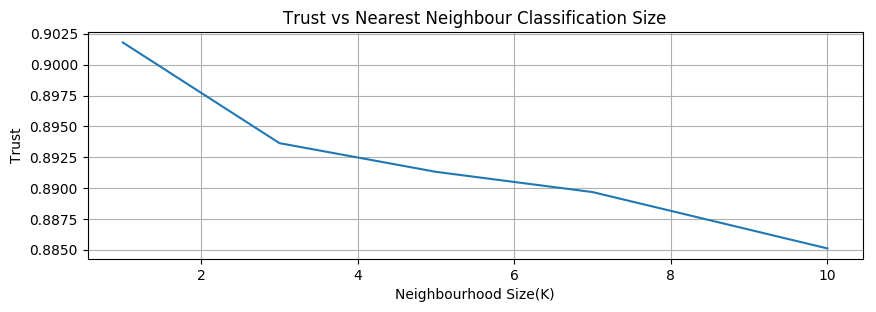

In [68]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [69]:
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
mds_reduce = mds.fit_transform(X_flat)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

MDS: 23 sec


In [70]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(mds_reduce)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)
ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1

Neearest neighbourboost size k =1 Continuity:0.9003343016284728
Neearest neighbourboost size k =3 Continuity:0.8932481694968064
Neearest neighbourboost size k =5 Continuity:0.8911808982175293
Neearest neighbourboost size k =7 Continuity:0.8908855698514023
Neearest neighbourboost size k =10 Continuity:0.888670038053732


Neearest neighbourboost size k =1 Trust:0.8501309855740875
Neearest neighbourboost size k =3 Trust:0.8488514998874868
Neearest neighbourboost size k =5 Trust:0.8486038114629938
Neearest neighbourboost size k =7 Trust:0.8472727326845323
Neearest neighbourboost size k =10 Trust:0.8469430473136258


Text(0.5,1,'Trust vs Nearest Neighbour Classification Size')

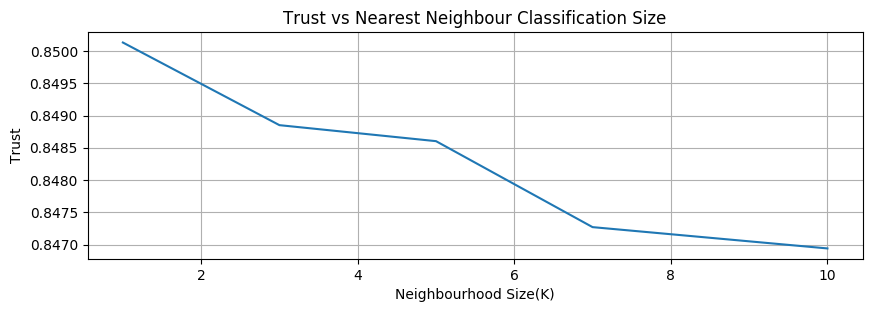

In [71]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [72]:
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Spectral_reduce = se.fit_transform(X_flat)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))

SpectralEmbedding: 10 sec


In [73]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(Spectral_reduce)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)
ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1

Neearest neighbourboost size k =1 Continuity:0.934265074359104
Neearest neighbourboost size k =3 Continuity:0.922109103183258
Neearest neighbourboost size k =5 Continuity:0.9129158849097843
Neearest neighbourboost size k =7 Continuity:0.9060244957914252
Neearest neighbourboost size k =10 Continuity:0.9005755113041969


Neearest neighbourboost size k =1 Trust:0.8753406208236602
Neearest neighbourboost size k =3 Trust:0.8711286804798255
Neearest neighbourboost size k =5 Trust:0.8668523379894189
Neearest neighbourboost size k =7 Trust:0.863598683943719
Neearest neighbourboost size k =10 Trust:0.8591785066569558


Text(0.5,1,'Trust vs Nearest Neighbour Classification Size')

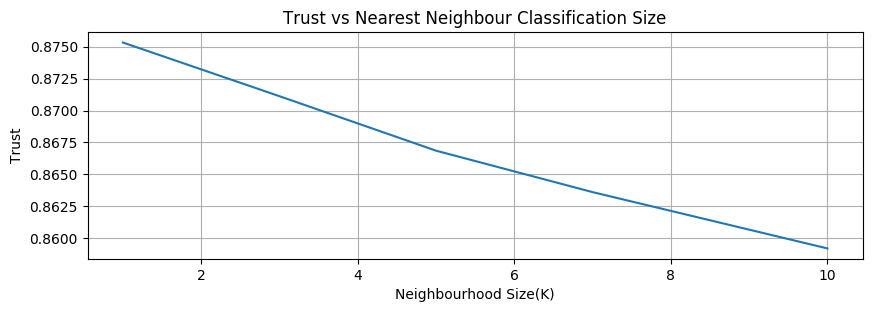

In [74]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [75]:
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
tsne_red = tsne.fit_transform(X_flat)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

t-SNE: 1.2e+02 sec


In [76]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(tsne_red)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)
ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1

Neearest neighbourboost size k =1 Continuity:0.9968830488723315
Neearest neighbourboost size k =3 Continuity:0.9914650083952156
Neearest neighbourboost size k =5 Continuity:0.9880113535153381
Neearest neighbourboost size k =7 Continuity:0.9852304568135082
Neearest neighbourboost size k =10 Continuity:0.9820405179901939


Neearest neighbourboost size k =1 Trust:0.9987470494219395
Neearest neighbourboost size k =3 Trust:0.9961629537311107
Neearest neighbourboost size k =5 Trust:0.9938122041188349
Neearest neighbourboost size k =7 Trust:0.9918866759905303
Neearest neighbourboost size k =10 Trust:0.9893898546440106


Text(0.5,1,'Trust vs Nearest Neighbour Classification Size')

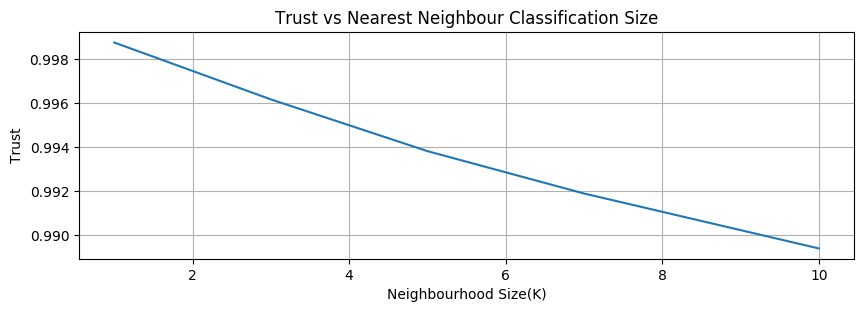

In [77]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [39]:
def initialize_latent(input_dim, Y):
    Xr = np.asfortranarray(np.random.normal(0, 1, (Y.shape[0], input_dim)))
    p = GPy.util.pca.PCA(Y)
    PC = p.project(Y, min(input_dim, Y.shape[1]))
    Xr[:PC.shape[0], :PC.shape[1]] = PC
    var = .1*p.fracs[:input_dim]
    Xr -= Xr.mean(0)
    Xr /= Xr.std(0)
    return Xr, var/var.max()

In [82]:
from __future__ import print_function
import gpflow
from gpflow import kernels
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import pods
pods.datasets.overide_manual_authorize = True  # dont ask to authorize
gpflow.settings.numerics.quadrature = 'error'  # throw error if quadrature is used for kernel expectations

In [83]:
M = 100  # number of inducing pts
N = X_flat.shape[0]
X_mean = gpflow.models.PCA_reduce(X_flat, Q) # Initialise via PCA
Z = np.random.permutation(X_mean.copy())[:M]
k = (kernels.RBF(Q, ARD=True))
m4 = gpflow.models.BayesianGPLVM(X_mean=X_mean, X_var=0.1*np.ones((N, Q)), Y= tf.cast(X_flat, tf.float64),
                                kern=k, M=M, Z=Z)

In [84]:
m4.likelihood.variance= 0.2953218115879997
m4.compile()
o = gpflow.train.AdamOptimizer(0.01)
o.minimize(m4, maxiter=100) # start near MAP
s = gpflow.train.HMC()
samples = s.sample(m4, 100, epsilon=0.12, lmax=20, lmin=5, thin=5, logprobs=True)

In [85]:
X_loc = np.average(samples['BayesianGPLVM/X_mean'], axis=0)

In [87]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(X_loc)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)
ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1

Neearest neighbourboost size k =1 Continuity:0.9740424312892844
Neearest neighbourboost size k =3 Continuity:0.9678000207716675
Neearest neighbourboost size k =5 Continuity:0.9635207859565909
Neearest neighbourboost size k =7 Continuity:0.9606774051084801
Neearest neighbourboost size k =10 Continuity:0.9575147016883693


Neearest neighbourboost size k =1 Trust:0.911364051751292
Neearest neighbourboost size k =3 Trust:0.9056923023662391
Neearest neighbourboost size k =5 Trust:0.9047103046283909
Neearest neighbourboost size k =7 Trust:0.9027971962926294
Neearest neighbourboost size k =10 Trust:0.9001681516823978


Text(0.5,1,'Trust vs Nearest Neighbour Classification Size')

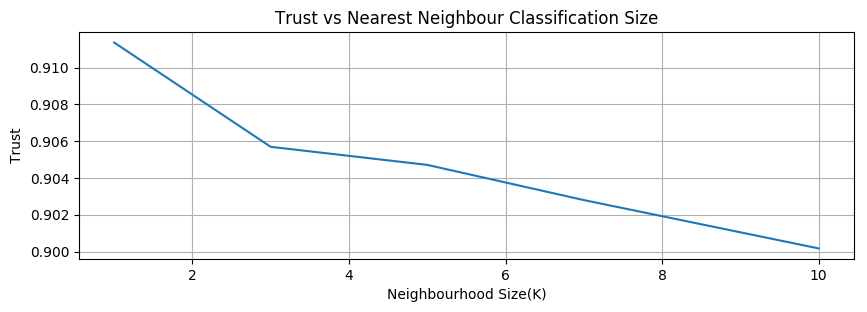

In [88]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(Y.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [92]:
kernel = GPy.kern.RBF(5, ARD=True) 
m2 = GPy.models.GPLVM(X_flat, input_dim= 5 ,kernel=kernel,init='PCA')
m2.data_labels = X_flat.argmax(axis=1)
loss3 = m2.optimize('lbfgs', messages=1,max_iters=2000) 

In [93]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(m2.X)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)
ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(X_flat.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1

Neearest neighbourboost size k =1 Continuity:0.994168711493417
Neearest neighbourboost size k =3 Continuity:0.9902015717228367
Neearest neighbourboost size k =5 Continuity:0.9870181419605487
Neearest neighbourboost size k =7 Continuity:0.9844200694490177
Neearest neighbourboost size k =10 Continuity:0.9806899792274002


Neearest neighbourboost size k =1 Trust:0.9984712084504815
Neearest neighbourboost size k =3 Trust:0.9962687161378546
Neearest neighbourboost size k =5 Trust:0.9947831039096295
Neearest neighbourboost size k =7 Trust:0.9933300145438878
Neearest neighbourboost size k =10 Trust:0.9909412669915363


Text(0.5,1,'Trust vs Nearest Neighbour Classification Size')

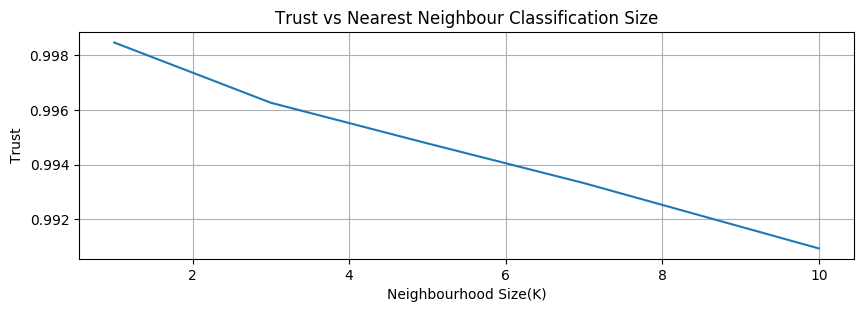

In [95]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(X_flat.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1
pyplot.figure(figsize=(10,3), dpi=100).set_facecolor('white')
pyplot.plot(ks,trust)
pyplot.grid()
pyplot.xlabel('Neighbourhood Size(K)')
pyplot.ylabel('Trust')
#pyplot.yscale('log')
pyplot.title('Trust vs Nearest Neighbour Classification Size')

In [59]:

def sammon(x, n = 2, display = 2, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'pca'):
    import numpy as np 
    from scipy.spatial.distance import cdist

    X = x

    # Create distance matrix unless given by parameters
    if inputdist == 'distance':
        xD = X
    else:
        xD = cdist(X, X)

    # Remaining initialisation
    N = X.shape[0] # hmmm, shape[1]?
    scale = 0.5 / xD.sum()

    if init == 'pca':
        [UU,DD,_] = np.linalg.svd(X)
        Y = UU[:,:n]*DD[:n] 
    else:
        Y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])

    xD = xD + np.eye(N)        
    xDinv = 1 / xD # Returns inf where D = 0.
    xDinv[np.isinf(xDinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).    
    yD = cdist(Y, Y) + np.eye(N)
    yDinv = 1. / yD # Returns inf where d = 0. 
    
    np.fill_diagonal(xD, 1)    
    np.fill_diagonal(yD, 1)
    np.fill_diagonal(xDinv, 0)
    np.fill_diagonal(yDinv, 0)
    
    xDinv[np.isnan(xDinv)] = 0
    yDinv[np.isnan(xDinv)] = 0
    xDinv[np.isinf(xDinv)] = 0    
    yDinv[np.isinf(yDinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
    
    delta = xD - yD 
    E = ((delta**2)*xDinv).sum() 

    # Get on with it
    for i in range(maxiter):

        # Compute gradient, Hessian and search direction (note it is actually
        # 1/4 of the gradient and Hessian, but the step size is just the ratio
        # of the gradient and the diagonal of the Hessian so it doesn't
        # matter).
        delta = yDinv - xDinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta, Y) - (Y * deltaone)
        dinv3 = yDinv ** 3
        y2 = Y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2, Y) * np.dot(dinv3, Y) + y2 * np.dot(dinv3,one)
        s = -g.flatten(order='F') / np.abs(H.flatten(order='F'))
        y_old = Y

        # Use step-halving procedure to ensure progress is made
        for j in range(maxhalves):
            s_reshape = s.reshape(2,int(len(s)/2)).T
            y = y_old + s_reshape
            d = cdist(y, y) + np.eye(N)
            dinv = 1 / d # Returns inf where D = 0. 
            dinv[np.isinf(dinv)] = 0 # Fix by replacing inf with 0 (default Matlab behaviour).
            delta = xD - d
            E_new = ((delta**2)*xDinv).sum()
            if E_new < E:
                break
            else:
                s = np.dot(0.5,s)

        # Bomb out if too many halving steps are required
        if j == maxhalves:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        # Evaluate termination criterion
        if np.abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break

        # Report progress
        E = E_new
        if display > 1:
            print('epoch = ' + str(i) + ': E = ' + str(E * scale))

    # Fiddle stress to match the original Sammon paper
    E = E * scale
    
    return [y,E]

In [35]:
def d_euclidean(a,b):
    """Returns euclidean distance between vectors a and b"""

    return math.sqrt(sum([ (x - y)**2 for (x,y) in zip (a,b) ]))
def rank_matrix(x):
    """Returns rank matrix from pairwise distance matrix a"""
    
    m = x.argsort()
    r = numpy.zeros(x.shape)

    vectors = x.shape[0]

    for i in range(vectors):
        for j in range(vectors):
            pos = numpy.where(m[i,:]==j)
            r[i,j] = pos[0][0] # there should be a better syntax for this
        
    return r.astype('int')


def centering(x):
    """Center matrix x to origo"""
    return x - x.mean(axis=0)


def double_centering(x):
    """Double center matrix x"""
    pass

def distance_matrix(x, distf=None):
    """Returns distance matrix of pairwise distances between vectors
    stored in array a

    distf is function used to calculate distance between vectors,
    if None, euclidean distance is used
    """

    if distf == None:
        distf = d_euclidean

    vectors = x.shape[0]
    d = numpy.zeros([vectors, vectors])

    for i in range(vectors):
        for j in range(i,vectors):
            dd = distf(x[i,:], x[j,:])
            d[i,j] = dd
            d[j,i] = dd

    return d
def moved_out(nn_orig, nn_proj, i, k):
    """Determine points that were neighbours in the original space,
    but are not neighbours in the projection space.

    nn_orig
      neighbourhood matrix for original data

    nn_proj
      neighbourhood matrix for projection data

    i
      index of the point considered

    k
      size of the neighbourhood considered

    Return a list of indices for 'moved out' values 
    """

    oo = list(nn_orig[i, 1:k+1])
    pp = list(nn_proj[i, 1:k+1])

    for j in pp:
        if (j in pp) and (j in oo):
            oo.remove(j)

    return oo
def moved_in(nn_orig, nn_proj, i, k):
    """Determine points that are neighbours in the projection space,
    but were not neighbours in the original space.

    nn_orig
      neighbourhood matrix for original data

    nn_proj
      neighbourhood matrix for projection data

    i
      index of the point considered

    k
      size of the neighbourhood considered

    Return a list of indices for points which are 'moved in' to point i
    """

    pp = list(nn_proj[i, 1:k+1])
    oo = list(nn_orig[i, 1:k+1])

    for j in oo:
        if (j in oo) and (j in pp):
            pp.remove(j)

    return pp


def scaling_term(k, n):
    """Term that scales measure between zero and one

    k  size of the neighbourhood
    n  number of datapoints
    """

    if k < (n / 2.0):
        return 2.0 / ((n*k)*(2*n - 3*k - 1))
    else:
        return 2.0 / (n * (n - k) * (n - k - 1))


def trustcont_sum(moved, ranks, k):
    """Calculate sum used in trustworthiness or continuity calculation.

    moved

       List of lists of indices for those datapoints that have either
       moved away in (Continuity) or moved in (Trustworthiness)
       projection

    ranks

       Rank matrix of data set. For trustworthiness, ranking is in the
       original space, for continuity, ranking is in the projected
       space.

    k
       size of the neighbournood
    """

    n = ranks.shape[0]
    s = 0

    # todo: weavefy this for speed
    for i in range(n):
        for j in moved[i]:
            s = s + (ranks[i, j] - k)

    a = scaling_term(k, n)

    return 1 - a * s